In [1]:
!pip install boto3 astropy sfdmap progressbar2 GPUtil parse

  Using cached boto3-1.28.1-py3-none-any.whl (135 kB)
  Using cached astropy-5.3.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (10.1 MB)
  Using cached sfdmap-0.1.1-py3-none-any.whl
  Using cached progressbar2-4.2.0-py2.py3-none-any.whl (27 kB)
  Using cached GPUtil-1.4.0-py3-none-any.whl
  Using cached parse-1.19.1-py2.py3-none-any.whl (18 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached botocore-1.31.1-py3-none-any.whl (11.0 MB)
  Using cached s3transfer-0.6.1-py3-none-any.whl (79 kB)
  Using cached pyerfa-2.0.0.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (741 kB)
  Using cached python_utils-3.7.0-py2.py3-none-any.whl (26 kB)


In [4]:
# imports
import pandas as pd
import numpy as np
import os
import sys
import pickle
import boto3
from matplotlib import pyplot as plt
import time

# random seed
seed = 42
np.random.seed(seed)

# local files paths
local_home_dir_path = os.path.expanduser("~")
local_work_dir_path = os.path.join(local_home_dir_path, 'thesis2')
local_code_dir_path = os.path.join(local_work_dir_path , 'code')

# S3 file paths
endpoint_url = 'https://s3-west.nrp-nautilus.io'
bucket_name = 'tau-astro'
prefix = 'almogh'
s3_work_dir_path = os.path.join(prefix, 'thesis2')
s3_data_dir_path = os.path.join(s3_work_dir_path , 'data')
s3_models_dir_path = os.path.join(s3_work_dir_path , 'models')
s3_final_table_csv_path = os.path.join(s3_data_dir_path, 'SDSS_DR16_all.csv')

s3_client = boto3.client("s3", endpoint_url=endpoint_url)

# adding code folder to path
sys.path.insert(1, local_code_dir_path)
from s3 import to_s3_npy, to_s3_pkl, from_s3_npy, from_s3_pkl, to_s3_fig

In [5]:
gs_outliers = from_s3_pkl(s3_client, bucket_name, 'almogh/thesis2/eval/gs_outliers_with_scores.pkl')

loading from uri: s3://tau-astro/almogh/thesis2/eval/gs_outliers_with_scores.pkl


In [7]:
gs_outliers.sort_values(by='NN_score',ascending=False).iloc[0]

specobjid           2255301266211104768
snMedian                       13.32238
run2d                                26
ra                            186.15299
dec                           37.410154
plate                              2003
mjd                               53442
fiberid                             450
waveMin                        3811.536
waveMax                        9215.099
z                               0.04038
key                      2003_53442_450
weirdness                          0.69
spectrotype                      GALAXY
subclass                      STARBURST
oii_3726_eqw                  -54.74792
oii_3729_eqw                  -54.74792
neiii_3869_eqw                -26.28569
h_delta_eqw                   -18.99245
h_gamma_eqw                   -37.46724
oiii_4363_eqw                 -9.999014
h_beta_eqw                    -104.2134
oiii_4959_eqw                 -188.1588
oiii_5007_eqw                 -583.3107
hei_5876_eqw                  -16.69367


In [8]:
D_NN = from_s3_npy(s3_client = s3_client, bucket_name = bucket_name, path_in_bucket = 'almogh/thesis2/eval/inference/D_NN2.npy')

loading from uri: s3://tau-astro/almogh/thesis2/eval/inference/D_NN2.npy


In [10]:
NN_scores = np.mean(D_NN,axis=1)

In [22]:
NN_all_scores = np.concatenate([NN_scores,gs_outliers.NN_score])

In [85]:
hist_all, bin_edges_all = np.histogram(NN_all_scores, bins=100)
bin_centers_all = (bin_edges_all[:-1]+bin_edges_all[1:])/2
bin_width_all = bin_edges_all[1]-bin_edges_all[0]

In [86]:
hist_outliers, bin_edges_outliers = np.histogram(gs_outliers.NN_score, bins=8)
bin_centers_outliers = (bin_edges_outliers[:-1]+bin_edges_outliers[1:])/2
bin_width_outliers = bin_edges_outliers[1]-bin_edges_outliers[0]

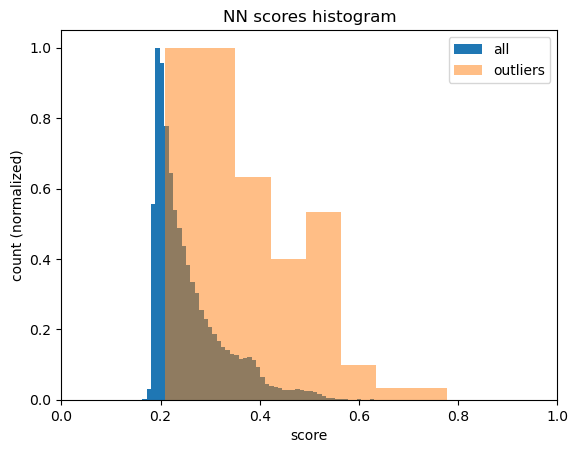

In [87]:
fig, ax = plt.subplots()
ax.bar(bin_centers_all, hist_all/max(hist_all), width=bin_width_all, label='all')
ax.bar(bin_centers_outliers, hist_outliers/max(hist_outliers), width=bin_width_outliers, alpha=0.5, label='outliers')
ax.set_xlim([0,1])
ax.set_title('NN scores histogram')
ax.set_xlabel('score')
ax.set_ylabel('count (normalized)')
ax.legend()

In [47]:
D_BigRF = from_s3_npy(s3_client = s3_client, bucket_name = bucket_name, path_in_bucket = 'almogh/thesis2/eval/inference/D_BigRF.npy')

loading from uri: s3://tau-astro/almogh/thesis2/eval/inference/D_BigRF.npy


In [48]:
BigRF_scores = np.mean(D_BigRF,axis=1)

In [49]:
BigRF_all_scores = np.concatenate([BigRF_scores,gs_outliers.BigRF_score])

In [80]:
hist_all, bin_edges_all = np.histogram(BigRF_all_scores, bins=100)
bin_centers_all = (bin_edges_all[:-1]+bin_edges_all[1:])/2
bin_width_all = bin_edges_all[1]-bin_edges_all[0]

In [81]:
hist_outliers, bin_edges_outliers = np.histogram(gs_outliers.BigRF_score, bins=8)
bin_centers_outliers = (bin_edges_outliers[:-1]+bin_edges_outliers[1:])/2
bin_width_outliers = bin_edges_outliers[1]-bin_edges_outliers[0]

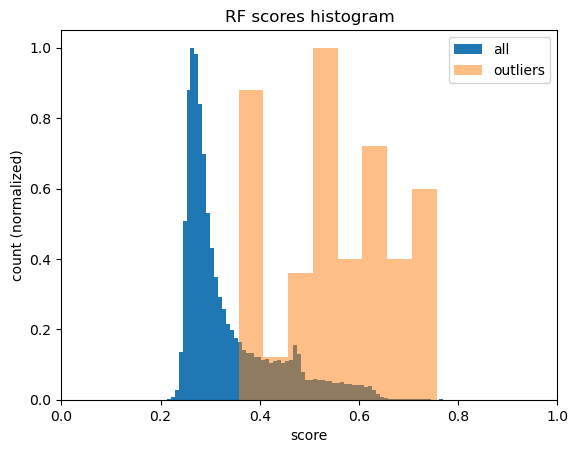

In [83]:
fig, ax = plt.subplots()
ax.bar(bin_centers_all, hist_all/max(hist_all), width=bin_width_all, label='all')
ax.bar(bin_centers_outliers, hist_outliers/max(hist_outliers), width=bin_width_outliers, alpha=0.5, label='outliers')
ax.set_xlim([0,1])
ax.set_title('RF scores histogram')
ax.set_xlabel('score')
ax.set_ylabel('count (normalized)')
ax.legend()

In [88]:
np.mean(gs_outliers.BigRF_score)

0.5563305849119595

In [90]:
np.mean(BigRF_all_scores)

0.33476932292982625

In [89]:
np.mean(gs_outliers.NN_score)

0.368182492854904

In [91]:
np.mean(NN_all_scores)

0.25868448896065066